# 4. Performing Sentiment Analysis using Text Classification (Step 1)

## Dependencies

In [1]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_colwidth', 1000)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pickle
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings 
from sklearn import exceptions
warnings.filterwarnings("ignore", category=exceptions.ConvergenceWarning) 

## Functions

In [3]:
#Takes the choosen values for hyperameter and a classifier as parameters 
#and perform a gridsearch with a scoring based on accuracy
def grid(param_grid,classifier): 
    start = time.time()
    grid_clf = GridSearchCV(classifier, param_grid = param_grid, scoring = 'accuracy', n_jobs=4,verbose=4, cv=cv)
    grid_clf.fit(bow, y=Y) 
    end = time.time()
    print("Best parameters = ", grid_clf.best_params_, " grid time : ", round((end - start)/60, 4))
    return(grid_clf.best_params_)

In [5]:
#Takes features and the target with a classifier as parameters 
#and perform the split, training and evaluation (step 1)
def train (classifier,X0,Y0):
    start = time.time()
    matrix = np.zeros((n,n))
    accuracy = 0
    run = 0
    for train_ix, test_ix in CV.split(X0, Y0):
        run+=1
        xtrain, xtest = X0[train_ix, :], X0[test_ix, :]
        ytrain, ytest = Y0[train_ix], Y0[test_ix]
        
        #training
        classifier.fit(xtrain,ytrain)
        
        # Predicting with a test set
        predicted = classifier.predict(xtest)

        # Accuracy
        a = metrics.accuracy_score(ytest, predicted)
        print("Model Accuracy ",run," : ", a)
        accuracy = accuracy + a
        
        #Confusion matrix
        m = metrics.confusion_matrix(ytest, predicted)
        matrix = matrix + m
        
    end = time.time()
    print("fit time : ", round((end - start)/60, 4))
    return matrix,accuracy/cv

In [6]:
#Takes the confusion matrix, accuracy and a name as parameters and plot the matrix with all information
def plot_matrix (matrix,accuracy,name):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)
    if n == 2:
        cmd = metrics.ConfusionMatrixDisplay(matrix, display_labels=["Positive","Negative"])
        ax.text(-0.8,2.1, "Accuracy = "+str(round(accuracy,4))+"\n"+legend+"\nFeatures = "+str(bow.shape[1])+ 
                                                                    "  Elements = "+str(bow.nnz),fontsize=16)
    else:
        cmd = metrics.ConfusionMatrixDisplay(matrix, display_labels=["1","2","3","4","5"])
        ax.text(-0.5,6, "Accuracy = "+str(round(accuracy,4))+"\n"+legend+"\nFeatures = "+str(bow.shape[1])+ 
                                                                    "  Elements = "+str(bow.nnz),fontsize=16)
        
    plt.rc('font', size=18);plt.rc('axes', titlesize=20);plt.rc('axes', labelsize=14);
                            plt.rc('xtick', labelsize=12);plt.rc('ytick', labelsize=12)
    cmd.plot(ax=ax,cmap="magma_r",values_format='g')
    ax.set_title(str(name),fontsize=22)
    #plt.savefig("plot/"+data_name+" "+ name+"_matrix.png", bbox_inches="tight")

## Data

In [13]:
data=pickle.load(open("english_to_french_product.dataset", "rb"))
data

,rating,review,translation,review_proc,review_proc+lemma,translation_proc,translation_proc+lemma
0,1,Arrived broken. Manufacturer defect. Two of th...,Arrivé cassé.Défaut du fabricant.Deux des jamb...,Arrived broken Manufacturer defect Two the leg...,Arrived break Manufacturer defect two the leg ...,Arrivé cassé Défaut fabricant Deux des jambes ...,arriver cassé Défaut fabricant Deux de jambe b...
1,1,the cabinet dot were all detached from backing...,Le meuble dot a été tous détachés du support ...,the cabinet dot were all detached from backing...,the cabinet dot be all detach from backing get,meuble dot été tous détachés support,meuble dot être tout détaché support
2,1,I received my first order of this product and ...,J'ai reçu mon premier ordre de ce produit et i...,received first order this product and was brok...,receive first order this product and be break ...,mon premier ordre produit été cassé alors comm...,mon premier ordre produire être casser alors c...
3,1,This product is a piece of shit. Do not buy. D...,Ce produit est un morceau de merde.N'achète pa...,This product piece shit not buy Doesn work and...,this product piece shit not buy Doesn work and...,produit est morceau merde achète pas Cela fonc...,produit être morceau merd achète pas cela fonc...
4,1,went through 3 in one day doesn't fit correct ...,traversé 3 en une journée ne correspond pas co...,went through one day doesn fit correct and cou...,go through one day doesn fit correct and could...,traversé une journée correspond pas correct po...,traverser un journée correspondre pas correct ...
...,...,...,...,...,...,...,...
199995,5,"Cute slippers, my MIL loved them.","Des pantoufles mignons, mes mil leur aimaient.",Cute slippers MIL loved them,cute slipper MIL love -PRON-,Des pantoufles mignons mes mil leur aimaient,un pantoufle mignon mon mil leur aimaient
199996,5,My 6 year old likes this and keeps him engaged...,Mon enfant de 6 ans aime cela et le maintient ...,year old likes this and keeps him engaged does...,year old like this and keep -PRON- engaged doe...,Mon enfant ans aime cela maintient engagé souc...,mon enfant an aim cela maintient engager souci...
199997,5,Replaced my battery with it. Works like new.,Remplacé ma batterie avec elle.Fonctionne comm...,Replaced battery with Works like new,replace battery with work like new,Remplacé batterie avec elle Fonctionne comme neuf,Remplacé batterie avec lui fonctionne comme neuf
199998,5,"I like them, holding up well.","Je les aime bien, tenant bien.",like them holding well,like -PRON- hold well,les aime bien tenant bien,le aime bien tenir bien


In [14]:
df=data[["rating","review","translation"]]

In [15]:
df.to_csv('english_to_french_products.csv', index=False, header = ["rating","review","translation"])

In [8]:
#Define sample number, fold number for the cross validation and features and target columns
cv = 5
CV = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
n = len(data['rating'].value_counts())
Y=data['rating']

Text(0.5, 1.0, 'English movies review distribution')

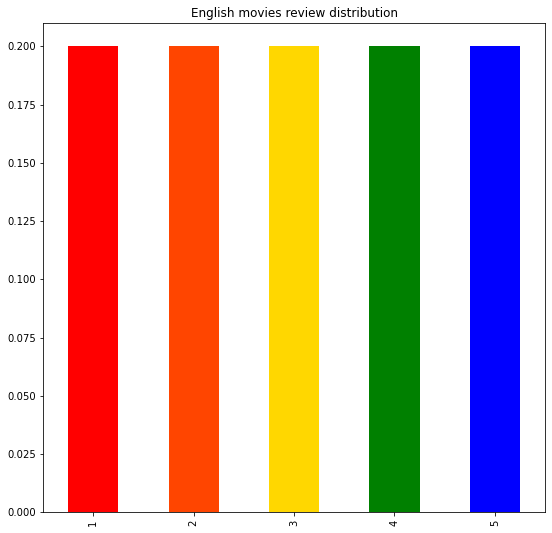

In [14]:
#Plot the distribution of the target value
if n == 2:
    data["rating"].value_counts(normalize=True).plot(kind='bar',  figsize=(9, 9), color=['green','orangered'])
    ax1 = plt.subplot()
    ax1.set_xticklabels(["Positif","Negatif"]) 
else:
    data["rating"].value_counts(normalize=True).plot(kind='bar',  figsize=(9, 9), 
                                                            color=['red', 'orangered', 'gold', 'green', 'blue'])
plt.title("English movies review distribution")
plt.savefig("plot/En_to_fr_movie/distribution.png", bbox_inches="tight")

## Vectorization, training and results

In [ ]:
#Define dataset and language
dataset_name ="Fr_to_en_product" #movie ou product
english = True

In [ ]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review'])

data_name = dataset_name+"/review+bow+2grams"
legend = "No preprocessing. English\nVectorisation with Bow and n-grams=2"

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 3}  grid time :  0.1479
Model Accuracy  1  :  0.5236
Model Accuracy  2  :  0.522575
Model Accuracy  3  :  0.52175
Model Accuracy  4  :  0.521825
Model Accuracy  5  :  0.5238
fit time :  0.0374


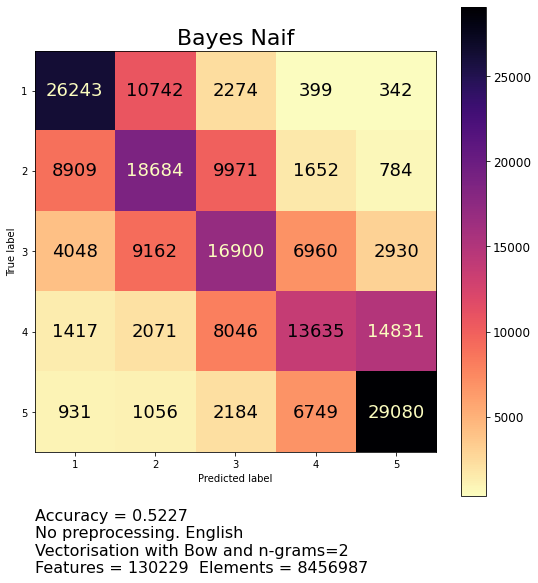

In [14]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.01}  grid time :  27.0173
Model Accuracy  1  :  0.539425
Model Accuracy  2  :  0.53985
Model Accuracy  3  :  0.540475
Model Accuracy  4  :  0.537975
Model Accuracy  5  :  0.5384
fit time :  5.1231


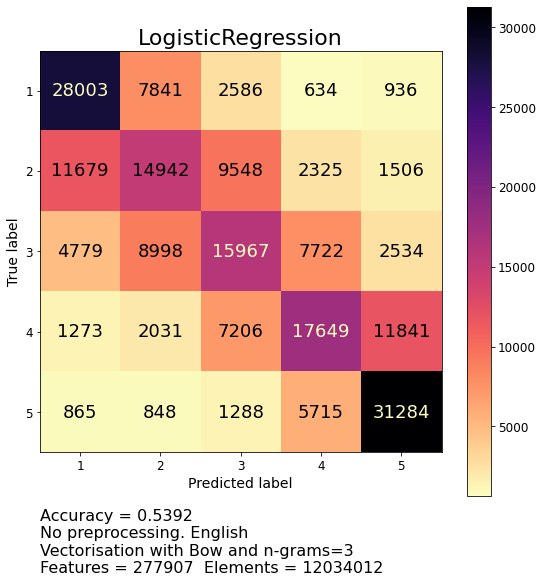

In [172]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [173]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review_proc'])

data_name = dataset_name+"/review_proc+bow+3grams"
legend = "Preprocessing. English\nVectorisation with Bow and n-grams=3"

<200000x224334 sparse matrix of type '<class 'numpy.int64'>'
	with 9206079 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 2}  grid time :  0.2954
Model Accuracy  1  :  0.5297
Model Accuracy  2  :  0.529375
Model Accuracy  3  :  0.528525
Model Accuracy  4  :  0.52995
Model Accuracy  5  :  0.52665
fit time :  0.0459


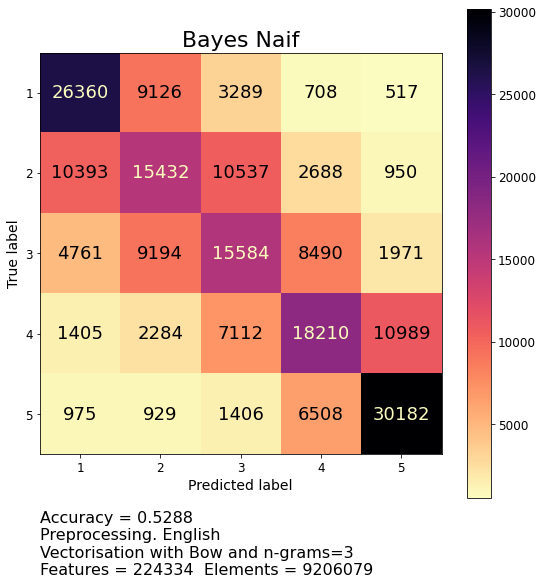

In [174]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.01}  grid time :  7.9634
Model Accuracy  1  :  0.534375
Model Accuracy  2  :  0.533775
Model Accuracy  3  :  0.535675
Model Accuracy  4  :  0.53485
Model Accuracy  5  :  0.53115
fit time :  2.8379


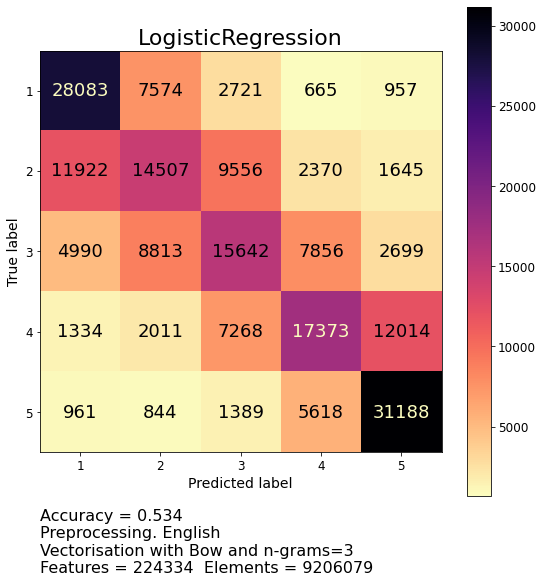

In [175]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [176]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review_proc+lemma'])

data_name = dataset_name+"/review_proc+lemma+bow+3grams"
legend = "Preprocessing and lemmatisation. English\nVectorisation with Bow and n-grams=3"

<200000x226160 sparse matrix of type '<class 'numpy.int64'>'
	with 9610435 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 2}  grid time :  0.2206
Model Accuracy  1  :  0.526275
Model Accuracy  2  :  0.526175
Model Accuracy  3  :  0.526625
Model Accuracy  4  :  0.5287
Model Accuracy  5  :  0.525
fit time :  0.0392


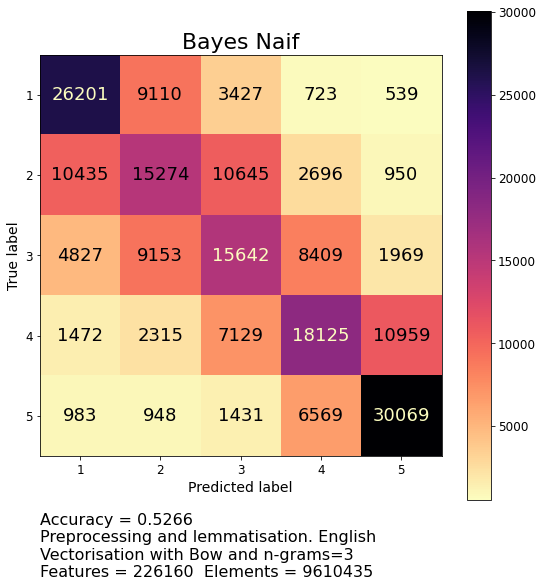

In [177]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plo#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)t confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.01}  grid time :  6.4899
Model Accuracy  1  :  0.531225
Model Accuracy  2  :  0.5331
Model Accuracy  3  :  0.534725
Model Accuracy  4  :  0.532075
Model Accuracy  5  :  0.5305
fit time :  2.8062


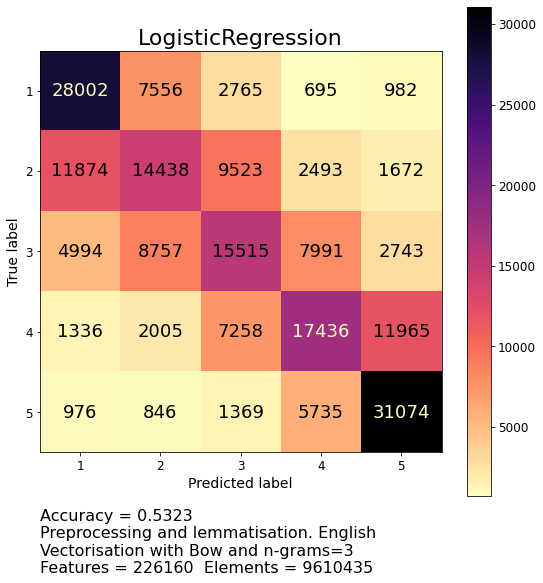

In [178]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [179]:
#Create vectors reprensenting the comments
if english:
    load_model = spacy.load('en_core_web_sm') #fr_core_news_sm en_core_web_sm
else:
    load_model = spacy.load('fr_core_news_sm')
all_stopwords = load_model.Defaults.stop_words # -stopwords

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5, stop_words=all_stopwords)
bow = vectorizer.fit_transform(data['review_proc+lemma'])

data_name = dataset_name+"/review_proc+lemma-stopword+bow+3grams"
legend = "Preprocessing, lemmatisation and stopwords removal. English\nVectorisation with Bow and n-grams=3"

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<200000x108114 sparse matrix of type '<class 'numpy.int64'>'
	with 4128777 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 3}  grid time :  0.1573
Model Accuracy  1  :  0.473575
Model Accuracy  2  :  0.46975
Model Accuracy  3  :  0.4739
Model Accuracy  4  :  0.472325
Model Accuracy  5  :  0.468675
fit time :  0.0313


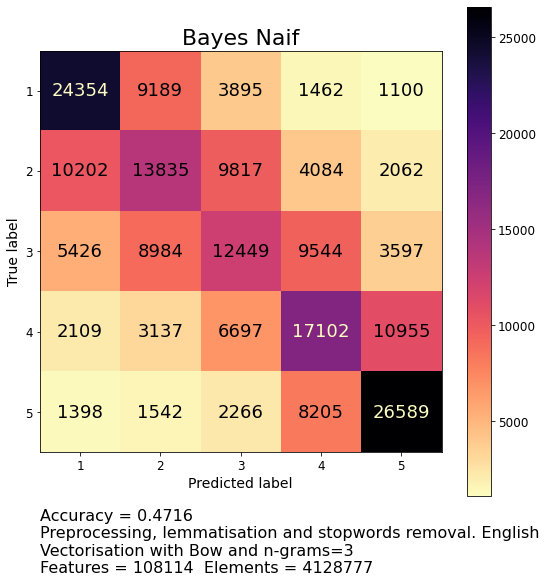

In [180]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.05}  grid time :  2.6954
Model Accuracy  1  :  0.4834
Model Accuracy  2  :  0.484675
Model Accuracy  3  :  0.486175
Model Accuracy  4  :  0.481825
Model Accuracy  5  :  0.4849
fit time :  1.5279


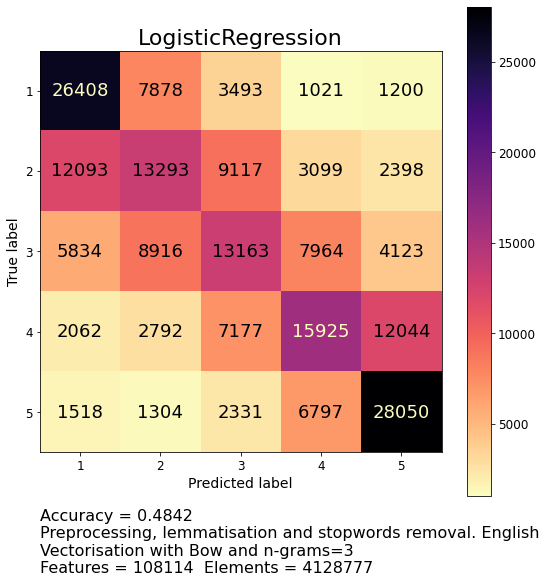

In [181]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [182]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review'])

data_name = dataset_name+"/review+tfidf+3grams"
legend = "No preprocessing. English\nVectorisation with Tfidf and n-grams=3"

<200000x277907 sparse matrix of type '<class 'numpy.float64'>'
	with 12034012 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 1}  grid time :  0.2725
Model Accuracy  1  :  0.53365
Model Accuracy  2  :  0.534425
Model Accuracy  3  :  0.53535
Model Accuracy  4  :  0.5334
Model Accuracy  5  :  0.530175
fit time :  0.0481


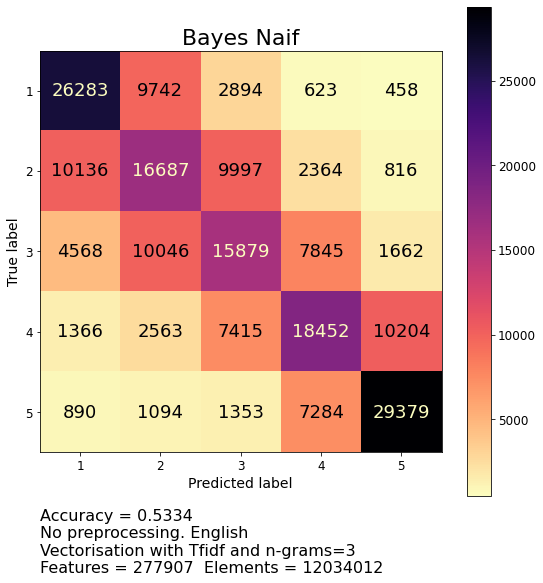

In [183]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.5}  grid time :  21.3852
Model Accuracy  1  :  0.54245
Model Accuracy  2  :  0.54315
Model Accuracy  3  :  0.546725
Model Accuracy  4  :  0.5455
Model Accuracy  5  :  0.5421
fit time :  3.4329


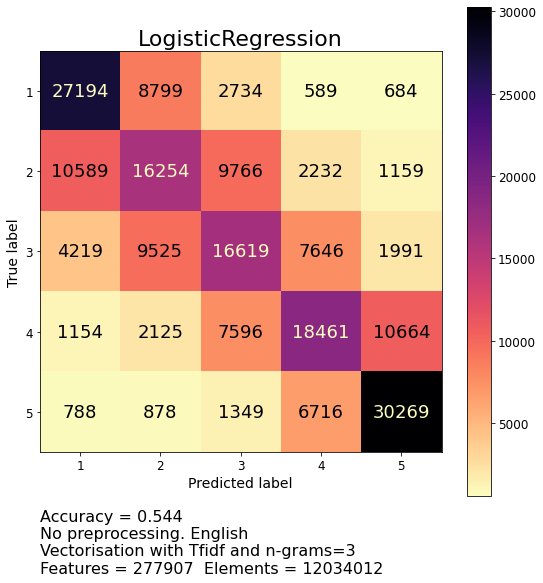

In [184]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [185]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review_proc'])

data_name = dataset_name+"/review_proc+tfidf+3grams"
legend = "Preprocessing. English\nVectorisation with Tfidf and n-grams=3"

<200000x224334 sparse matrix of type '<class 'numpy.float64'>'
	with 9206079 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 2}  grid time :  0.2167
Model Accuracy  1  :  0.5269
Model Accuracy  2  :  0.531675
Model Accuracy  3  :  0.531125
Model Accuracy  4  :  0.5302
Model Accuracy  5  :  0.526975
fit time :  0.0387


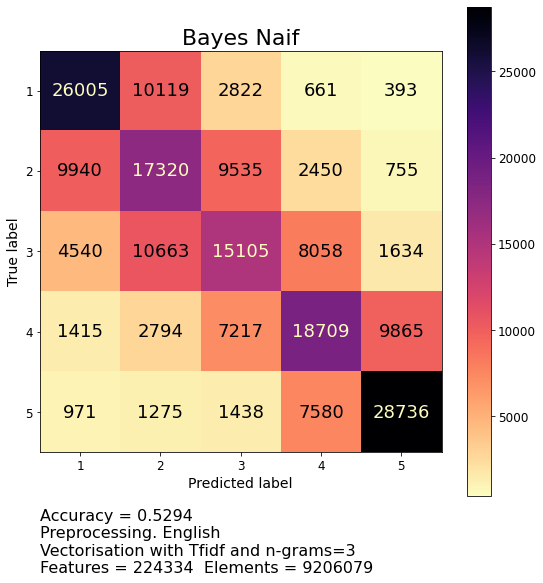

In [186]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.5}  grid time :  6.0099
Model Accuracy  1  :  0.536775
Model Accuracy  2  :  0.541075
Model Accuracy  3  :  0.54175
Model Accuracy  4  :  0.5405
Model Accuracy  5  :  0.5382
fit time :  2.6977


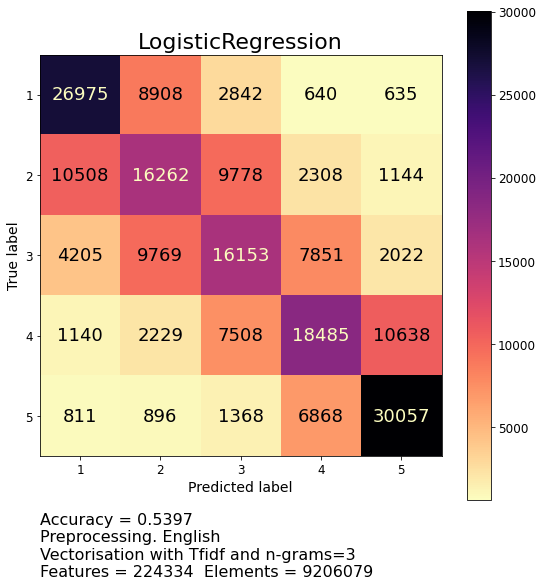

In [187]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [188]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['review_proc+lemma'])

data_name = dataset_name+"/review_proc+lemma+tfidf+3grams"
legend = "Preprocessing and lemmatisation. English\nVectorisation with Tfidf and n-grams=3"

<200000x226160 sparse matrix of type '<class 'numpy.float64'>'
	with 9610435 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 1}  grid time :  0.2244
Model Accuracy  1  :  0.52615
Model Accuracy  2  :  0.527325
Model Accuracy  3  :  0.52725
Model Accuracy  4  :  0.528225
Model Accuracy  5  :  0.52415
fit time :  0.0404


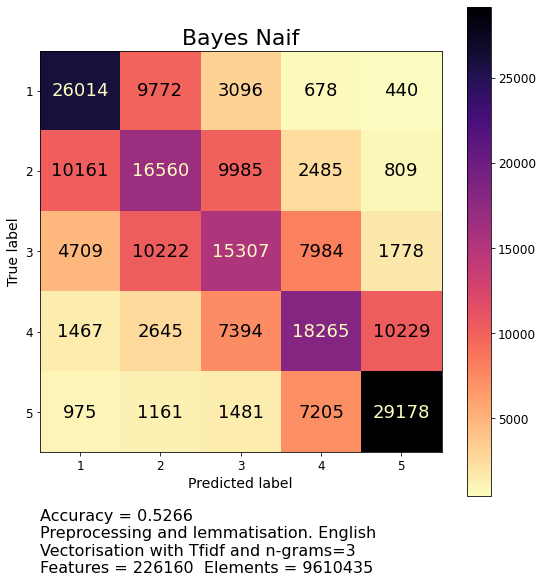

In [189]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.5}  grid time :  6.1672
Model Accuracy  1  :  0.53585
Model Accuracy  2  :  0.539975
Model Accuracy  3  :  0.540675
Model Accuracy  4  :  0.5399
Model Accuracy  5  :  0.5365
fit time :  2.7999


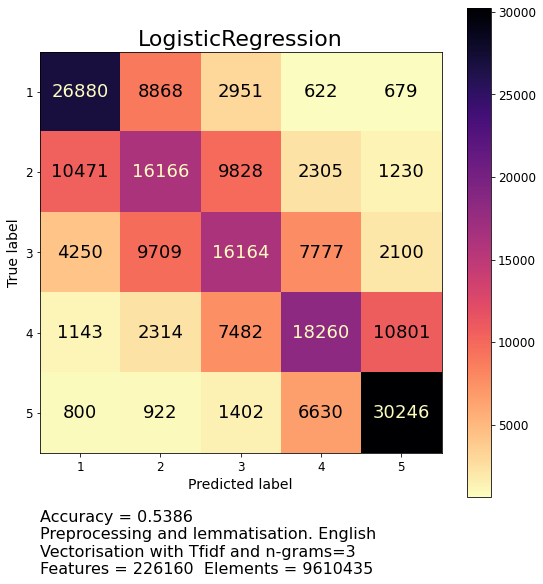

In [190]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [191]:
#Create vectors reprensenting the comments
if english:
    load_model = spacy.load('en_core_web_sm') #fr_core_news_sm en_core_web_sm
else:
    load_model = spacy.load('fr_core_news_sm')
all_stopwords = load_model.Defaults.stop_words # -stopwords

vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5, stop_words=all_stopwords)
bow = vectorizer.fit_transform(data['review_proc+lemma'])

data_name = dataset_name+"/review_proc+lemma-stopword+tfidf+3grams"
legend = "Preprocessing, lemmatisation and stopwords removal. English\nVectorisation with Tfidf and n-grams=3"

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<200000x108114 sparse matrix of type '<class 'numpy.float64'>'
	with 4128777 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 7}  grid time :  0.1673
Model Accuracy  1  :  0.474
Model Accuracy  2  :  0.473825
Model Accuracy  3  :  0.477925
Model Accuracy  4  :  0.475975
Model Accuracy  5  :  0.47
fit time :  0.0334


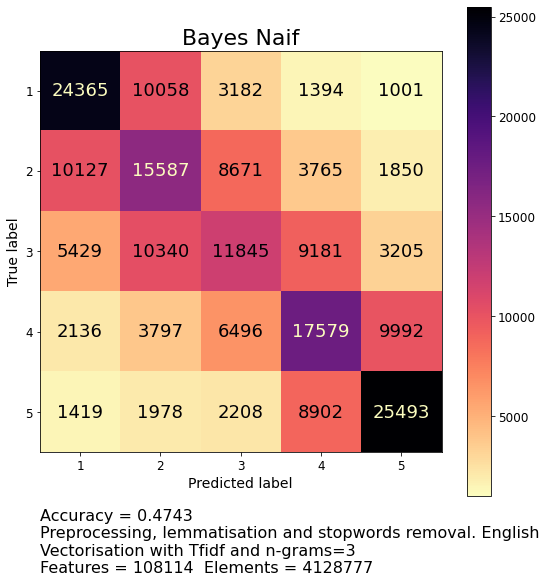

In [192]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.5}  grid time :  2.6578
Model Accuracy  1  :  0.486475
Model Accuracy  2  :  0.484525
Model Accuracy  3  :  0.489125
Model Accuracy  4  :  0.48375
Model Accuracy  5  :  0.4861
fit time :  1.3071


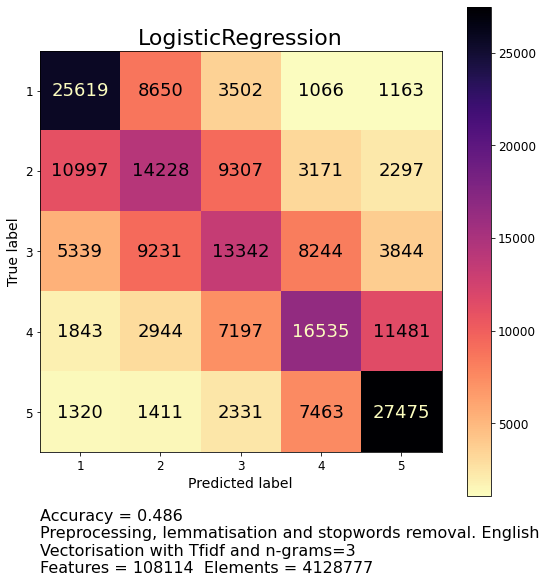

In [193]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

# Traduction

In [ ]:
#Redefine language
english = False

In [11]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation'])

data_name = dataset_name+"/translation+bow+3grams"
legend = "No preprocessing. French Translated\nVectorisation with Bow and n-grams=3"

<200000x206700 sparse matrix of type '<class 'numpy.int64'>'
	with 9413993 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 3}  grid time :  0.1741
Model Accuracy  1  :  0.516925
Model Accuracy  2  :  0.5137
Model Accuracy  3  :  0.5161
Model Accuracy  4  :  0.513025
Model Accuracy  5  :  0.51455
fit time :  0.0402


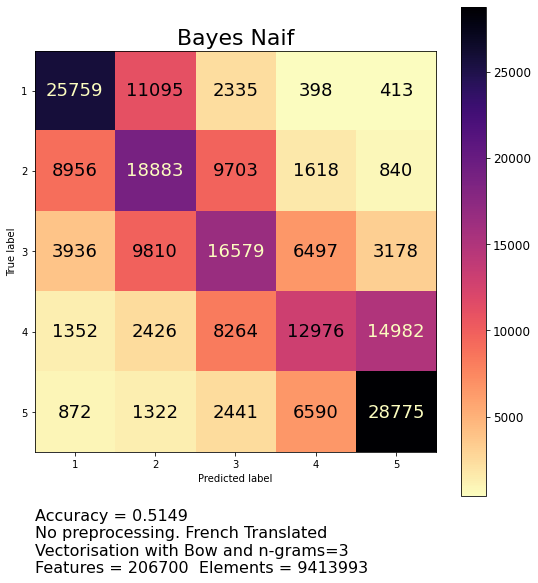

In [12]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.01}  grid time :  12.2953
Model Accuracy  1  :  0.530875
Model Accuracy  2  :  0.5285
Model Accuracy  3  :  0.528175
Model Accuracy  4  :  0.527925
Model Accuracy  5  :  0.5305
fit time :  5.028


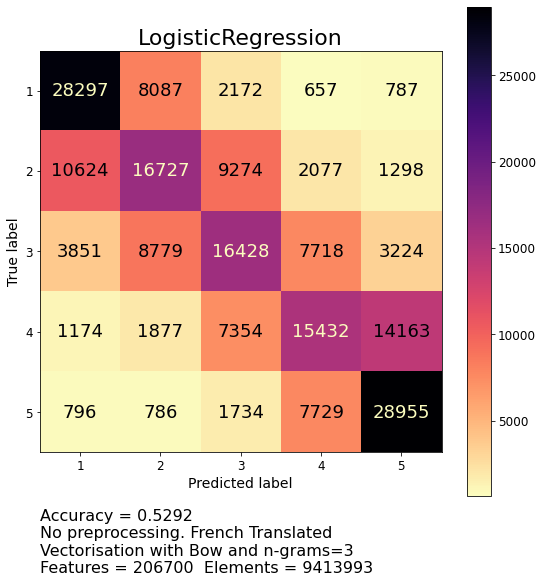

In [13]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [198]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation_proc'])

data_name = dataset_name+"/translation_proc+bow+3grams"
legend = "Preprocessing. French Translated\nVectorisation with Bow and n-grams=3"

<200000x218621 sparse matrix of type '<class 'numpy.int64'>'
	with 9076900 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 2}  grid time :  0.259
Model Accuracy  1  :  0.51495
Model Accuracy  2  :  0.513075
Model Accuracy  3  :  0.516175
Model Accuracy  4  :  0.513425
Model Accuracy  5  :  0.512075
fit time :  0.0418


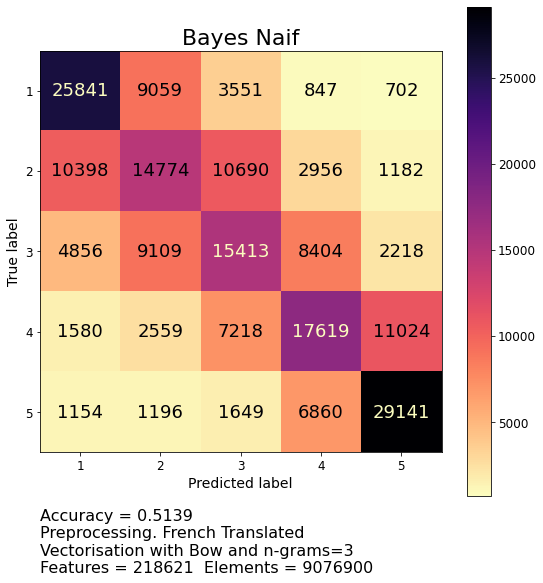

In [199]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.05}  grid time :  6.3238
Model Accuracy  1  :  0.51835
Model Accuracy  2  :  0.51935
Model Accuracy  3  :  0.52325
Model Accuracy  4  :  0.51915
Model Accuracy  5  :  0.51905
fit time :  2.7047


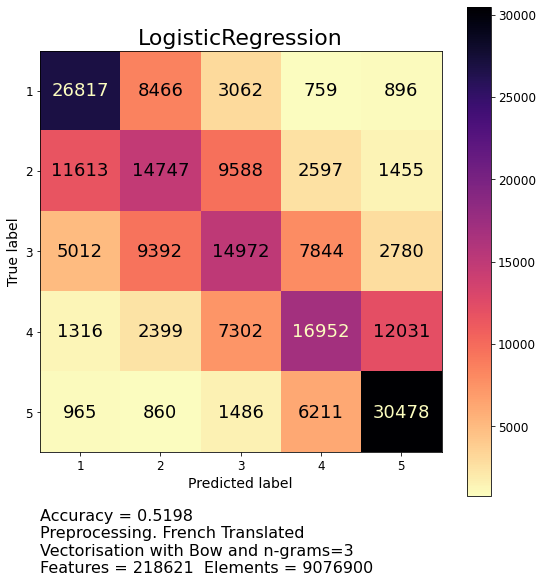

In [200]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [201]:
#Create vectors reprensenting the comments
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation_proc+lemma'])

data_name = dataset_name+"/translation_proc+lemma+bow+3grams"
legend = "Preprocessing and lemmatisation. French Translated\nVectorisation with Bow and n-grams=3"

<200000x216200 sparse matrix of type '<class 'numpy.int64'>'
	with 9347525 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 3}  grid time :  0.2209
Model Accuracy  1  :  0.5131
Model Accuracy  2  :  0.5106
Model Accuracy  3  :  0.514625
Model Accuracy  4  :  0.512875
Model Accuracy  5  :  0.511175
fit time :  0.0392


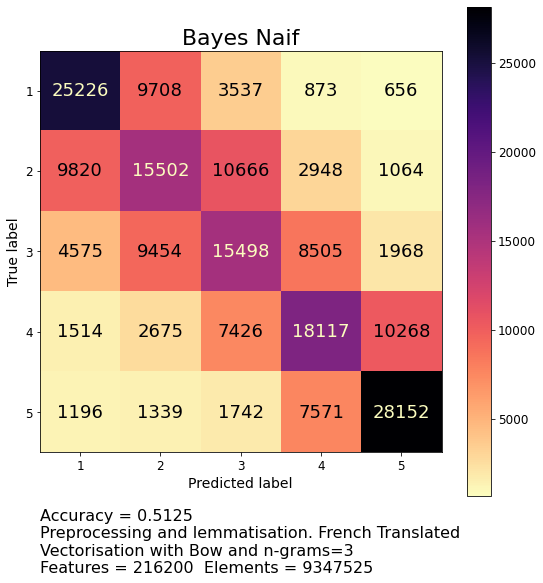

In [202]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.01}  grid time :  6.5302
Model Accuracy  1  :  0.519875
Model Accuracy  2  :  0.519125
Model Accuracy  3  :  0.520675
Model Accuracy  4  :  0.519125
Model Accuracy  5  :  0.517275
fit time :  2.7418


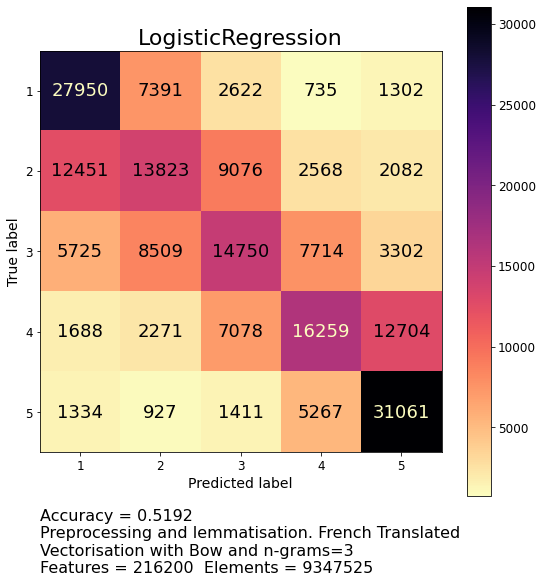

In [203]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [56]:
#Create vectors reprensenting the comments
if english:
    load_model = spacy.load('en_core_web_sm') #fr_core_news_sm en_core_web_sm
else:
    load_model = spacy.load('fr_core_news_sm')
all_stopwords = load_model.Defaults.stop_words # -stopwords

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5, stop_words=all_stopwords)
bow = vectorizer.fit_transform(data['translation_proc+lemma'])

data_name = dataset_name+"/translation_proc+lemma-stopword+bow+3grams"
legend = "Preprocessing, lemmatisation and stopwords removal. French Translated\nVectorisation with Bow and n-grams=3"

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<200000x79668 sparse matrix of type '<class 'numpy.int64'>'
	with 3197732 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 5}  grid time :  0.1216
Model Accuracy  1  :  0.469775
Model Accuracy  2  :  0.4637
Model Accuracy  3  :  0.465525
Model Accuracy  4  :  0.4628
Model Accuracy  5  :  0.46605
fit time :  0.0311


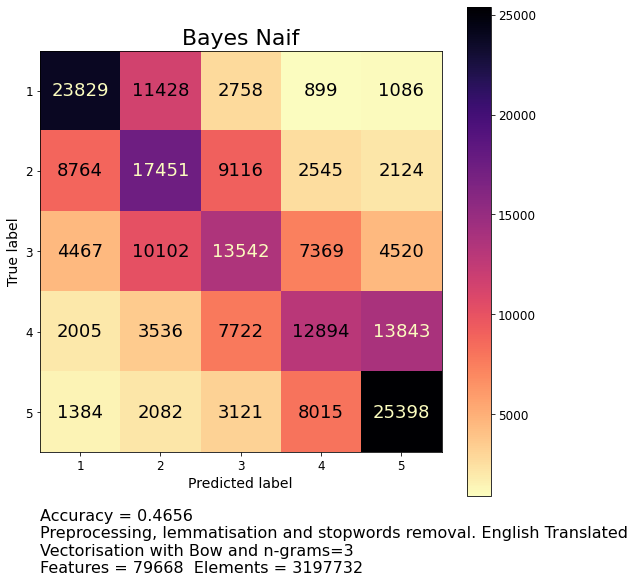

In [57]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.05}  grid time :  3.9618
Model Accuracy  1  :  0.479125
Model Accuracy  2  :  0.472725
Model Accuracy  3  :  0.4721
Model Accuracy  4  :  0.4702
Model Accuracy  5  :  0.478975
fit time :  1.0436


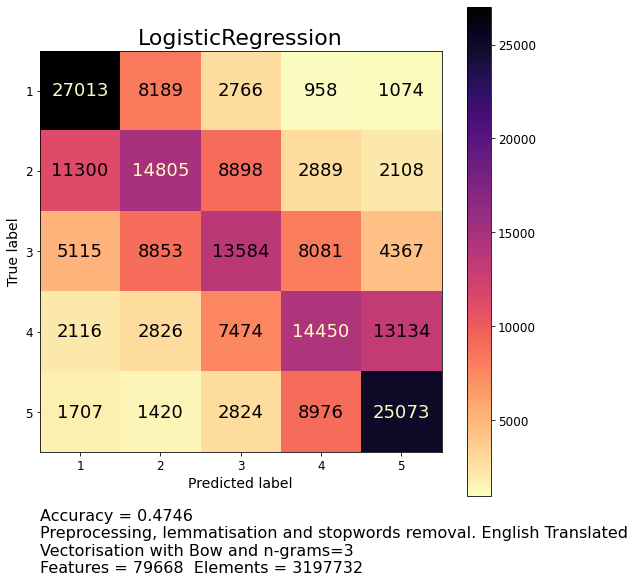

In [58]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [10]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation'])

data_name = dataset_name+"/translation+tfidf+3grams"
legend = "No preprocessing. French Translated\nVectorisation with Tfidf and n-grams=3"

<200000x303766 sparse matrix of type '<class 'numpy.float64'>'
	with 13851754 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 0.7}  grid time :  0.3254
Model Accuracy  1  :  0.5162
Model Accuracy  2  :  0.517575
Model Accuracy  3  :  0.51955
Model Accuracy  4  :  0.515125
Model Accuracy  5  :  0.5154
fit time :  0.0552


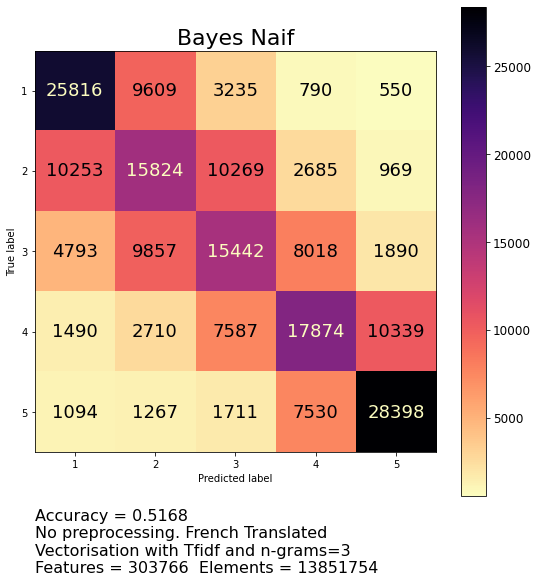

In [11]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.5}  grid time :  20.5236
Model Accuracy  1  :  0.53
Model Accuracy  2  :  0.52865
Model Accuracy  3  :  0.531425
Model Accuracy  4  :  0.5309
Model Accuracy  5  :  0.5269
fit time :  4.0947


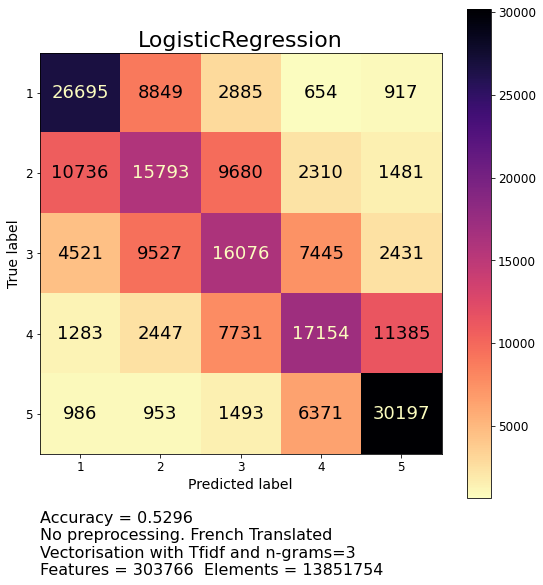

In [12]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [13]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation_proc'])

data_name = dataset_name+"/translation_proc+tfidf+3grams"
legend = "Preprocessing. French Translated\nVectorisation with Tfidf and n-grams=3"

<200000x218621 sparse matrix of type '<class 'numpy.float64'>'
	with 9076900 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 1}  grid time :  0.2608
Model Accuracy  1  :  0.511475
Model Accuracy  2  :  0.511275
Model Accuracy  3  :  0.517775
Model Accuracy  4  :  0.513525
Model Accuracy  5  :  0.5138
fit time :  0.0413


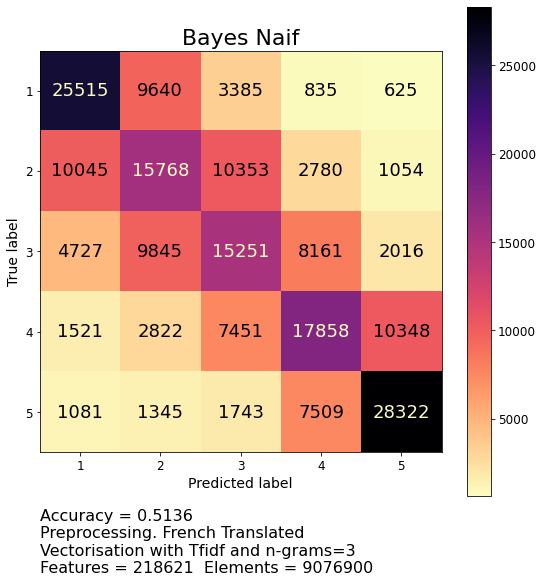

In [14]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.5}  grid time :  5.7917
Model Accuracy  1  :  0.52715
Model Accuracy  2  :  0.523575
Model Accuracy  3  :  0.529025
Model Accuracy  4  :  0.5247
Model Accuracy  5  :  0.524525
fit time :  2.446


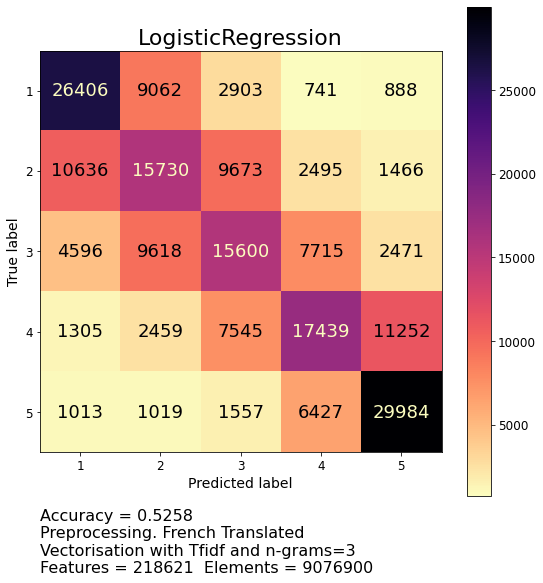

In [15]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [16]:
#Create vectors reprensenting the comments
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5)
bow = vectorizer.fit_transform(data['translation_proc+lemma'])

data_name = dataset_name+"/translation_proc+lemma+tfidf+3grams"
legend = "Preprocessing and lemmatisation. French Translated\nVectorisation with Tfidf and n-grams=3"

<200000x216200 sparse matrix of type '<class 'numpy.float64'>'
	with 9347525 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 1}  grid time :  0.2167
Model Accuracy  1  :  0.51245
Model Accuracy  2  :  0.5093
Model Accuracy  3  :  0.515675
Model Accuracy  4  :  0.513275
Model Accuracy  5  :  0.510975
fit time :  0.039


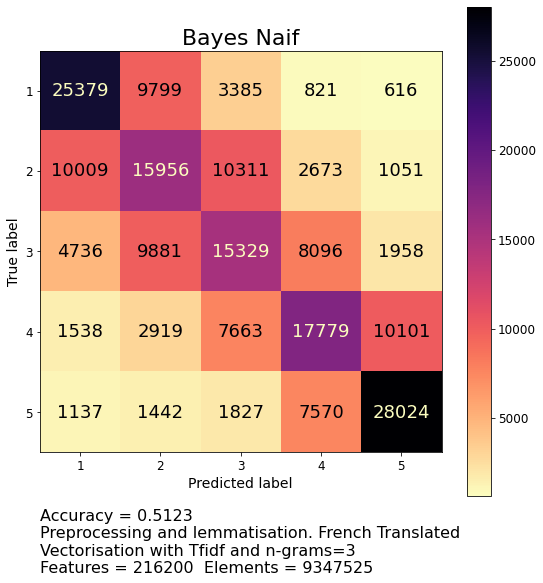

In [17]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters =  {'C': 0.5}  grid time :  5.5767
Model Accuracy  1  :  0.5246
Model Accuracy  2  :  0.5223
Model Accuracy  3  :  0.5295
Model Accuracy  4  :  0.524575
Model Accuracy  5  :  0.5214
fit time :  2.4331


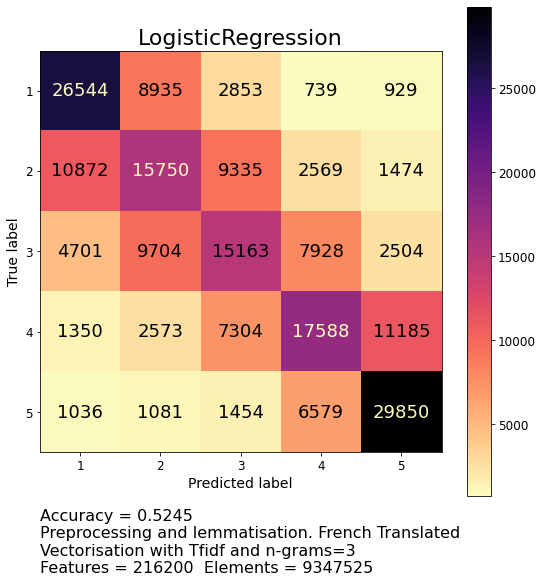

In [18]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

In [59]:
#Create vectors reprensenting the comments
if english:
    load_model = spacy.load('en_core_web_sm') #fr_core_news_sm en_core_web_sm
else:
    load_model = spacy.load('fr_core_news_sm')
all_stopwords = load_model.Defaults.stop_words # -stopwords

vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.90, min_df=5, stop_words=all_stopwords)
bow = vectorizer.fit_transform(data['translation_proc+lemma'])

data_name = dataset_name+"/translation_proc+lemma-stopword+tfidf+3grams"
legend = "Preprocessing, lemmatisation and stopwords removal. French Translated\nVectorisation with Tfidf and n-grams=3"

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<200000x79668 sparse matrix of type '<class 'numpy.float64'>'
	with 3197732 stored elements in Compressed Sparse Row format>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 5}  grid time :  0.0954
Model Accuracy  1  :  0.468625
Model Accuracy  2  :  0.462225
Model Accuracy  3  :  0.4652
Model Accuracy  4  :  0.4621
Model Accuracy  5  :  0.46645
fit time :  0.0317


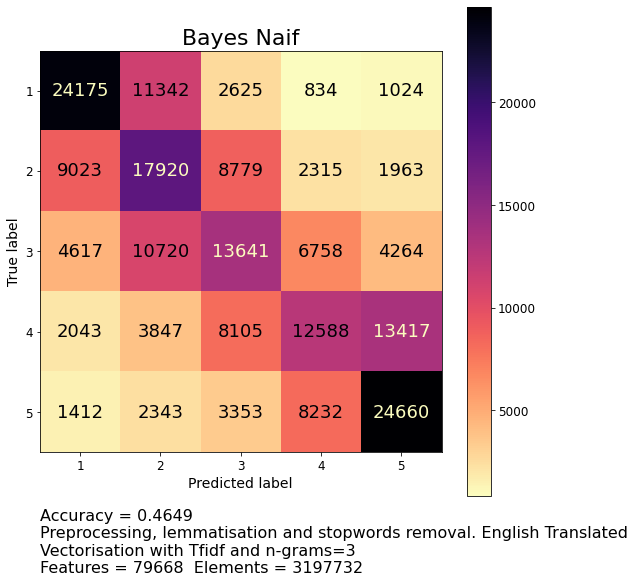

In [60]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.5}  grid time :  3.6112
Model Accuracy  1  :  0.48175
Model Accuracy  2  :  0.474275
Model Accuracy  3  :  0.47445
Model Accuracy  4  :  0.4692
Model Accuracy  5  :  0.477775
fit time :  1.1197


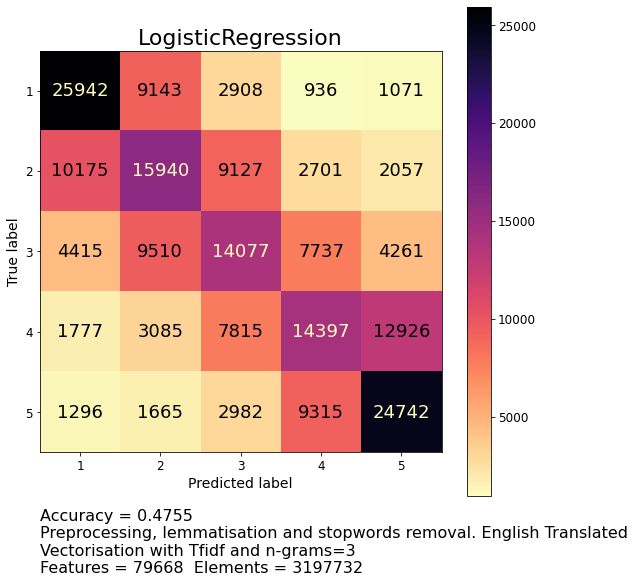

In [61]:
#Create classifier
clf = LogisticRegression()
name = "LogisticRegression"

#Run the gridsearch
param_grid0 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param0=grid(param_grid0,clf)
    
#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param0, max_iter = 200)
matrix,accuracy = train(clf,bow,Y)
plot_matrix(matrix,accuracy,name)